In [1]:
# Test van Ormondt runup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 
drv, _ = which_computer()

In [2]:
# conditions for 95th HoLo per Alfredo email
Hs95=2.61
Tp95=9.35
Bf = [.052, .103, .153]

In [3]:
# Read in Dean parameters fit to Cape Cod profiles in fit_Dean_parameter.m
csv = drv+'crs/proj/2022_Runup/cape_dean_params.csv'
colnames = ['pno','lon','lat','bslope','nsslope','a','rmse']
df = pd.read_csv(csv, header=None, names = colnames)
df.describe()

,pno,lon,lat,bslope,nsslope,a,rmse
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3612.014286,-70.018529,41.919279,0.097407,0.015050,0.129914,0.242286
std,23.027075,0.091703,0.135975,0.041468,0.006132,0.041188,0.155444
min,3573.000000,-70.245000,41.671400,0.021200,0.003700,0.064000,0.010000
25%,3592.250000,-70.077000,41.798875,0.074575,0.011850,0.096000,0.130000
50%,3612.500000,-69.985000,41.945200,0.089350,0.014350,0.129000,0.210000
75%,3630.750000,-69.937500,42.050125,0.118875,0.017100,0.149750,0.347500
max,3653.000000,-69.929000,42.080800,0.262200,0.047800,0.233000,0.690000


In [4]:
bslope = df['bslope'].values
a = df['a'].values

In [5]:
print(a)

[0.08  0.087 0.071 0.079 0.116 0.073 0.094 0.092 0.092 0.107 0.099 0.137
 0.136 0.106 0.129 0.103 0.153 0.101 0.093 0.102 0.1   0.097 0.137 0.189
 0.144 0.137 0.14  0.129 0.133 0.131 0.148 0.169 0.191 0.211 0.149 0.119
 0.129 0.122 0.064 0.129 0.143 0.233 0.181 0.184 0.13  0.195 0.168 0.211
 0.174 0.216 0.126 0.204 0.201 0.169 0.148 0.105 0.098 0.095 0.087 0.092
 0.086 0.086 0.079 0.096 0.096 0.094 0.116 0.132 0.181 0.15 ]


In [6]:
# Use 95% wave height and period, calculate range of runup based on dean profile
# Use constant median slope
s06r2 = np.nan*np.ones_like(bslope)
Vo21r2 = np.nan*np.ones_like(bslope)
print('Hs95: {}  Tp95: {}'.format(Hs95,Tp95))
Lo95 = calc_L0(Tp95)
print('Lo95: ',Lo95)

for i, ai in enumerate(a):
    Vo21r2[i] = VO21( Hs95, Tp95, ai, Bf[1])
    s06r2[i] = S06(Hs95, Lo95, Bf[1] )

Hs95: 2.61  Tp95: 9.35
Lo95:  136.49362275214648


In [7]:
# Use 95% wave height and period, calculate range of runup based on dean profile
# Use all of the slopes
s06r2s = np.nan*np.ones_like(bslope)
Vo21r2s = np.nan*np.ones_like(bslope)
for i, (ai,bs) in enumerate(zip(a,bslope)):
    Vo21r2s[i] = VO21( Hs95, Tp95, ai, bs)
    s06r2s[i] = S06(Hs95, Lo95, bs )

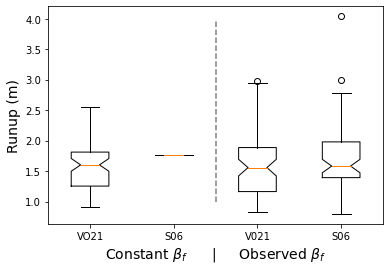

In [8]:
# Stack them together for boxplot
res = np.vstack((Vo21r2, s06r2, Vo21r2s, s06r2s)).T
#plt.title('Constant and Variable Beach Slope')
plt.boxplot(res, notch=True)
plt.plot([2.5, 2.5],[1.0,4.0],'--',c='gray')
#plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
plt.xticks([1,2,3,4], ['VO21','S06','V021','S06'])
plt.xlabel(r'Constant $\beta_f$      |     Observed $\beta_f$',fontsize=14)
plt.savefig(drv+'crs/proj/2022_runup/VO21_bar_fixed_slope_runup_boxplot.png', dpi=200)